<a href="https://colab.research.google.com/github/LonelyFriday/datamining_cuse_ANNs/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
!wget https://www.mycourseville.com/sites/all/modules/courseville/files/ckfinder/userfiles/1778432385795822/files/housePrice%20data_6445b99a8d179.csv

--2023-05-06 13:19:10--  https://www.mycourseville.com/sites/all/modules/courseville/files/ckfinder/userfiles/1778432385795822/files/housePrice%20data_6445b99a8d179.csv
Resolving www.mycourseville.com (www.mycourseville.com)... 52.74.72.67
Connecting to www.mycourseville.com (www.mycourseville.com)|52.74.72.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49588 (48K) [text/csv]
Saving to: ‘housePrice data_6445b99a8d179.csv’

housePrice data_644 100%[===================>]  48.43K   156KB/s    in 0.3s    

2023-05-06 13:19:11 (156 KB/s) - ‘housePrice data_6445b99a8d179.csv’ saved [49588/49588]



In [ ]:
import pandas as pd
data = pd.read_csv('/content/housePrice data_6445b99a8d179.csv', sep='\s+', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.04379,80.0,3.37,0,0.398,5.787,31.1,6.6115,4,337.0,16.1,396.90,10.24,19.4
1,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345.0,18.9,396.21,8.10,22.0
2,0.13554,12.5,6.07,0,0.409,5.594,36.8,6.4980,4,345.0,18.9,396.90,13.09,17.4
3,0.12816,12.5,6.07,0,0.409,5.885,33.0,6.4980,4,345.0,18.9,396.90,8.79,20.9
4,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305.0,19.2,383.73,6.72,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91,12.0
502,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666.0,20.2,379.70,18.03,14.6
503,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,24,666.0,20.2,383.32,13.11,21.4
504,5.82401,0.0,18.10,0,0.532,6.242,64.7,3.4242,24,666.0,20.2,396.90,10.74,23.0


In [ ]:
# check null and data type 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# split 80% to trainset and 20% to testset
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model ANNs

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(128, input_shape=(13,), activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

In [ ]:
# train model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 24ms/step - loss: 616.1143 - mean_absolute_error: 23.2440 - mean_squared_error: 616.1143 - val_loss: 572.5991 - val_mean_absolute_error: 21.6313 - val_mean_squared_error: 572.5991
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 591.3217 - mean_absolute_error: 22.7117 - mean_squared_error: 591.3217 - val_loss: 550.8484 - val_mean_absolute_error: 21.1170 - val_mean_squared_error: 550.8484
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 567.9098 - mean_absolute_error: 22.1982 - mean_squared_error: 567.9098 - val_loss: 529.2567 - val_mean_absolute_error: 20.6117 - val_mean_squared_error: 529.2567
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 543.1171 - mean_absolute_error: 21.6498 - mean_squared_error: 543.1171 - val_loss: 506.2243 - val_mean_absolute_error: 20.0409 - val_mean_squared_error: 506.2243
Epoch 5/100
11/11 [==============================] - 0s 8ms

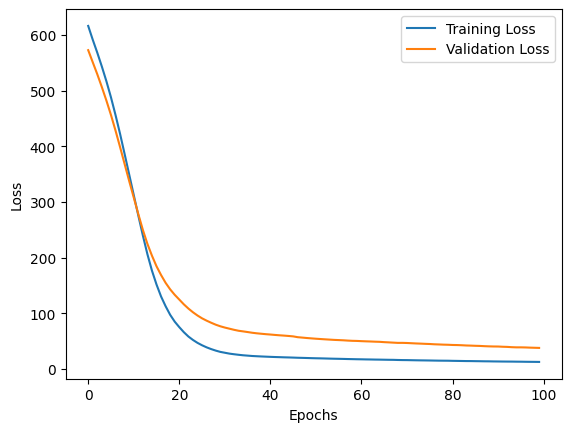

In [ ]:
# plot Training loss vs Validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Metric: MAE, MSE, RMSE
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

4/4 [==============================] - 0s 3ms/step
Mean Absolute Error: 2.9557123072007117
Mean Squared Error: 17.486918194229645
Root Mean Squared Error: 4.1817362655037975


# Tune by Keras Tuner

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                            activation='relu', input_shape=(13,)))
    model.add(layers.Dense(1))

    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

tuner.search(X_train, y_train, epochs=50, validation_split=0.2)


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = build_model(best_hps)

In [ ]:
# train model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 21ms/step - loss: 590.6411 - mean_absolute_error: 22.6501 - mean_squared_error: 590.6411 - val_loss: 558.1985 - val_mean_absolute_error: 21.2717 - val_mean_squared_error: 558.1985
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 589.2967 - mean_absolute_error: 22.6223 - mean_squared_error: 589.2967 - val_loss: 557.0960 - val_mean_absolute_error: 21.2478 - val_mean_squared_error: 557.0960
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 587.9918 - mean_absolute_error: 22.5955 - mean_squared_error: 587.9918 - val_loss: 555.9962 - val_mean_absolute_error: 21.2238 - val_mean_squared_error: 555.9962
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 586.6932 - mean_absolute_error: 22.5690 - mean_squared_error: 586.6932 - val_loss: 554.9169 - val_mean_absolute_error: 21.2006 - val_mean_squared_error: 554.9169
Epoch 5/100
11/11 [==============================] - 0s 7ms

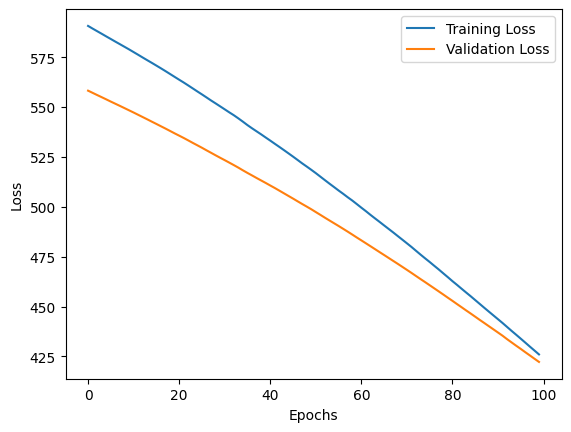

In [ ]:
# plot Training loss vs Validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Metric: MAE, MSE, RMSE
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

4/4 [==============================] - 0s 3ms/step
Mean Absolute Error: 21.017902282041085
Mean Squared Error: 509.2042788353527
Root Mean Squared Error: 22.56555514130669
